# Object Detection using YOLOv8n :


## Objective
To perform real-time object detection on video streams using the YOLOv8n model and analyze inference speed and detection confidence for lightweight real-time applications.


!pip install ultralytics opencv-python numpy matplotlib


In [37]:
from ultralytics import YOLO
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
print(model.device)

cpu


## Model Selection

YOLOv8n is chosen due to its lightweight architecture and low inference latency, making it suitable for real-time video analysis tasks where computational resources are limited.


In [31]:
model=YOLO('yolov8n.pt')

In [32]:
video_path=r"C:\Users\vpokh\Downloads\Highway_Accident_Video_Generation.mp4"
cap=cv2.VideoCapture(video_path)
assert cap.isOpened()

In [33]:
fps_list=[]

while cap.isOpened():
    ret,frame=cap.read()
    if not ret:
        break
    start_time=time.time()

    results=model(frame,
                 conf=0.4,
                 verbose=False
                 )
    annonated_frame=results[0].plot()
    end_time=time.time()
    fps_list.append(1/(end_time-start_time))
    cv2.imshow("YOLOv8n Detection",annonated_frame)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
    

In [34]:
print(f"Average FPS:{np.mean(fps_list):.2f}")
print(f"Max FPS: {np.max(fps_list):.2f}")
print(f"Min FPS: {np.min(fps_list):.2f}")

Average FPS:20.37
Max FPS: 34.34
Min FPS: 5.14


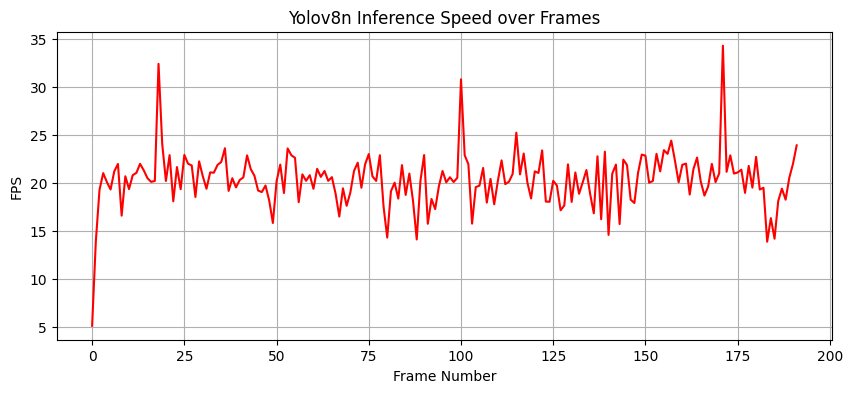

In [35]:
plt.figure(figsize=(10,4))
plt.plot(fps_list,color="red")
plt.xlabel("Frame Number")
plt.ylabel("FPS")
plt.title("Yolov8n Inference Speed over Frames")
plt.grid(True)
plt.show()

## Observations

- YOLOv8n achieves stable real-time inference on standard video input.
- FPS varies slightly due to scene complexity and number of detected objects.
- The lightweight nature of the model makes it suitable for downstream tracking and behavioral analysis tasks.
